# Linear regression

## 1. Load the provided .npy files. You can load it with numpy.

each file contains one vector, X and y
visualize X vs y on a scatter plot
fit an y=w_0 + w_1⋅X + w_2⋅X^2 linear regression using sklearn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = np.load('data/X.npy')
y = np.load('data/y.npy')

In [2]:
dat = pd.DataFrame({'y': y,'X': X})
dat

,y,X
0,83.454781,-25.091976
1,579.128860,90.142861
2,87.831523,46.398788
3,34.559137,19.731697
4,285.624528,-68.796272
...,...,...
995,416.495582,-81.683585
996,503.819002,83.462715
997,113.017478,-72.636274
998,578.007804,90.047471


In [3]:
dat["X2"] = dat["X"]**2
dat

,y,X,X2
0,83.454781,-25.091976,629.607271
1,579.128860,90.142861,8125.735440
2,87.831523,46.398788,2152.847561
3,34.559137,19.731697,389.339860
4,285.624528,-68.796272,4732.927029
...,...,...,...
995,416.495582,-81.683585,6672.208113
996,503.819002,83.462715,6966.024811
997,113.017478,-72.636274,5276.028274
998,578.007804,90.047471,8108.546991


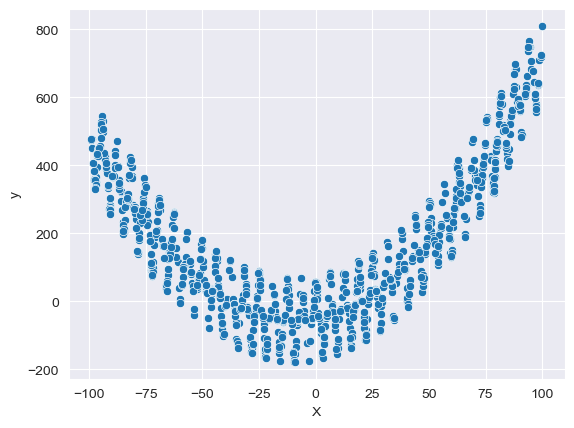

In [4]:
sns.scatterplot(x=dat["X"], y=dat["y"])
plt.show()

In [5]:
X_train_1, X_test_1 ,y_train_1, y_test_1 = train_test_split(dat[["X","X2"]].values,dat[["y"]].values, test_size=0.2)

In [6]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_1, y_train_1)

# Make predictions using the testing set
y_pred_1 = regr.predict(X_test_1)


# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_1, y_pred_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_1, y_pred_1))

Coefficients: 
 [[1.13907898 0.06533915]]
Mean squared error: 5084.34
Coefficient of determination: 0.88


## 2. Using different features

plot the residuals (the difference between the prediction and the actual y ) vs the original y
a non-random-noise like pattern suggests non-linear connection between the features and the predictions
someone told us that the connection between X and y is y=A⋅X+B⋅cos^3(X)+C⋅X^2+D
using sklearn's linear regression estimate A,B,C,D !
plot the residuals again! is it better now?

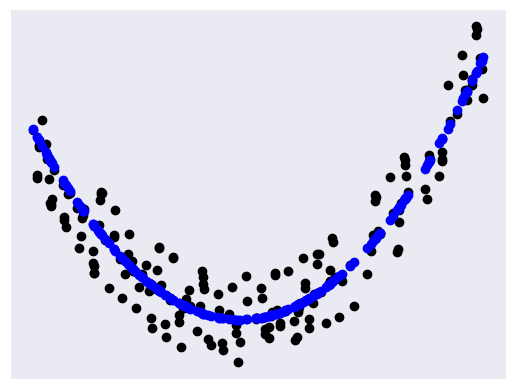

In [7]:
# # Plot outputs
plt.scatter(X_test_1[:,0], y_test_1, color="black")
plt.scatter(X_test_1[:,0], y_pred_1, color="blue")

plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
dat["cosX"] = np.cos(dat["X"])**3
dat

,y,X,X2,cosX
0,83.454781,-25.091976,629.607271,0.997510
1,579.128860,90.142861,8125.735440,-0.185966
2,87.831523,46.398788,2152.847561,-0.419235
3,34.559137,19.731697,389.339860,0.256653
4,285.624528,-68.796272,4732.927029,0.856354
...,...,...,...,...
995,416.495582,-81.683585,6672.208113,0.999993
996,503.819002,83.462715,6966.024811,-0.009124
997,113.017478,-72.636274,5276.028274,-0.801240
998,578.007804,90.047471,8108.546991,-0.117643


Coefficients: 
 [[1.19800857e+00 6.56650668e-02 1.23560817e+02]]
Mean squared error: 29.50
Coefficient of determination: 1.00


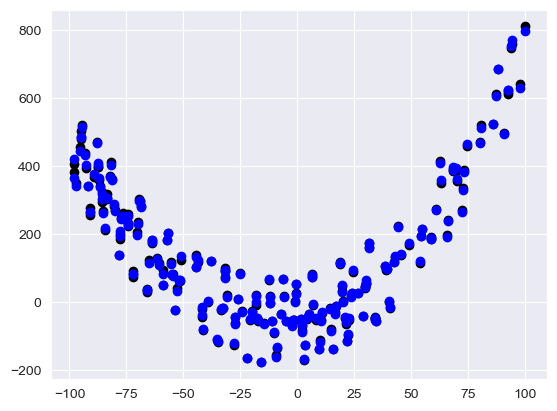

In [9]:
X_train_2, X_test_2 ,y_train_2, y_test_2 = train_test_split(dat[["X","X2","cosX"]].values,dat[["y"]].values, test_size=0.2)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_2, y_train_2)

# Make predictions using the testing set
y_pred_2 = regr.predict(X_test_2)


# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_2, y_pred_2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_2, y_pred_2))
# # Plot outputs
plt.scatter(X_test_2[:,0], y_test_2, color="black")
plt.scatter(X_test_2[:,0], y_pred_2, color="blue")
# plt.savefig("cos3X.png")
plt.show()

In [10]:
regr.intercept_

array([-50.00260821])

In [11]:
A_sklearn = regr.coef_[0,0]
B_sklearn = regr.coef_[0,1]
C_sklearn = regr.coef_[0,2]
D_sklearn = regr.intercept_[0]

## 3. Other methdods than sklearn for linear regression

using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
                                                                           is the result the same? if not guess, why? (did you not forget to add the constant term?)
try to get the same results with statsmodels as with sklearn!
using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?

In [12]:
import statsmodels.api as sm
X = sm.add_constant(X_train_2)
model = sm.OLS(y_train_2,X_train_2)
results = model.fit()
results.params

array([1.20242902e+00, 5.73650521e-02, 1.21524777e+02])

In [13]:
A_statmodels = results.params[0]
B_statmodels = results.params[1]
C_statmodels = results.params[2]
D_statmodels = regr.intercept_[0]

print(f"""
Sklearn:
A : {A_sklearn}
B : {B_sklearn}
C : {C_sklearn}
D : {D_sklearn}

Statmodels:
A : {A_statmodels}
B : {B_statmodels}
C : {C_statmodels}
D : {D_statmodels}
""")


Sklearn:
A : 1.1980085705808832
B : 0.06566506682957926
C : 123.56081667714453
D : -50.00260820769529

Statmodels:
A : 1.202429015829266
B : 0.05736505211680848
C : 121.52477688547958
D : -50.00260820769529



In [14]:
t_test = results.t_test(X_test_2)
t_test

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           452.2239      3.348    135.059      0.000     445.651     458.797
c1           728.9471      3.499    208.325      0.000     722.079     735.816
c2            41.3681      1.938     21.348      0.000      37.564      45.172
c3             1.6564      0.368      4.500      0.000       0.934       2.379
c4           247.8104      3.382     73.265      0.000     241.171     254.450
c5           360.6464      2.711    133.033      0.000     355.325     365.968
c6           389.7720      2.819    138.248      0.000     384.238     395.306
c7           129.6769      1.778     72.923      0.000     126.186     133.168
c8           105.6451      1.498     70.502      0.000     102.704     108.586

In [15]:
y_pred_OLS = results.predict(X_test_2)
y_pred_OLS

array([ 4.52223919e+02,  7.28947085e+02,  4.13680896e+01,  1.65636073e+00,
        2.47810399e+02,  3.60646384e+02,  3.89772047e+02,  1.29676941e+02,
        1.05645073e+02,  2.26487321e+01,  6.69692107e+02,  7.29355808e+01,
       -8.06005397e+01,  2.53448799e+02,  2.04911304e+02,  3.95212693e+02,
        5.19675802e+01,  1.99600736e+02,  1.28106086e+02, -1.62114631e+00,
        6.59921096e+01,  2.30911626e+02,  4.86933251e+01,  3.36896499e+02,
        2.47734046e+02, -1.14457233e+02,  3.52395620e+02, -2.32732730e+00,
       -4.17625742e+01,  2.06898937e+02,  2.53395932e+01,  2.21191947e+02,
        1.39493701e+02,  6.64924769e+00,  4.55924160e+01,  2.98266351e+02,
       -1.08768650e+02, -1.26244694e+02,  4.78076600e+02, -1.86857231e+01,
        7.63260513e+02,  2.33793057e+02,  2.10038944e+02,  9.11371515e+01,
        5.26022922e+01,  1.30125095e+00,  1.06642153e+02, -6.61699400e+01,
        1.35125039e+02,  6.00726677e+02,  5.19423941e+01,  3.73748699e+02,
        1.26890879e+02,  

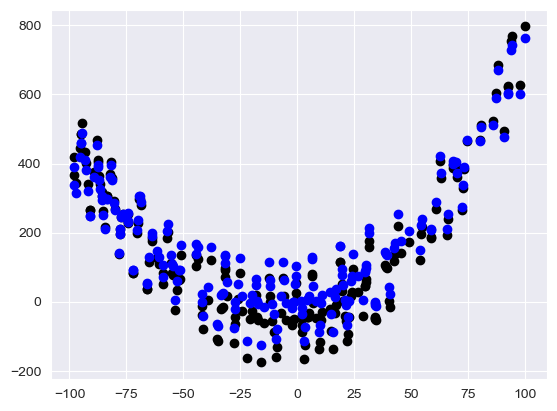

In [16]:
plt.scatter(X_test_2[:,0], y_pred_2, color="black")
plt.scatter(X_test_2[:,0], y_pred_OLS, color="blue")
plt.show()

In [17]:
test_predictions = pd.DataFrame({'sklearn': y_pred_2.ravel().tolist(),'statmodels': y_pred_OLS.ravel().tolist()})
test_predictions

,sklearn,statmodels
0,468.508864,452.223919
1,753.671574,728.947085
2,3.099481,41.368090
3,-45.603823,1.656361
4,264.906877,247.810399
...,...,...
195,28.824146,73.025175
196,463.817076,466.864216
197,769.050464,743.573788
198,-112.762668,-71.371296


In [18]:
w = np.dot(np.linalg.inv(np.dot(X_train_2.T, X_train_2)), np.dot(X_train_2.T, y_train_2))
w

array([[1.20242902e+00],
       [5.73650521e-02],
       [1.21524777e+02]])

In [19]:
print(f"""
Sklearn:
A : {A_sklearn}
B : {B_sklearn}
C : {C_sklearn}
D : {D_sklearn}

Statmodels:
A : {A_statmodels}
B : {B_statmodels}
C : {C_statmodels}
D : {D_statmodels}

Analytic:
A : {w[0][0]}
B : {w[1][0]}
C : {w[2][0]}
D : {D_sklearn}
""")


Sklearn:
A : 1.1980085705808832
B : 0.06566506682957926
C : 123.56081667714453
D : -50.00260820769529

Statmodels:
A : 1.202429015829266
B : 0.05736505211680848
C : 121.52477688547958
D : -50.00260820769529

Analytic:
A : 1.2024290158292728
B : 0.05736505211680856
C : 121.52477688547955
D : -50.00260820769529



## 4.

load the real_estate data to a pandas dataframe drop the ID column and the geographic location columns fit a linear regression model to predict the unit price using sklearn
interpret the coefficients and their meaning shortly with your own words
plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?

In [20]:
real_estate = pd.read_csv("data/real_estate.csv",header=0)
real_estate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [21]:
real_estate = real_estate.drop(columns=["No","X5 latitude","X6 longitude"])
real_estate

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1
...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5


Coefficients: 
 [[ 4.28422027 -0.2702152  -0.00554465  1.32847118]]
Mean squared error: 93.96
Coefficient of determination: 0.53


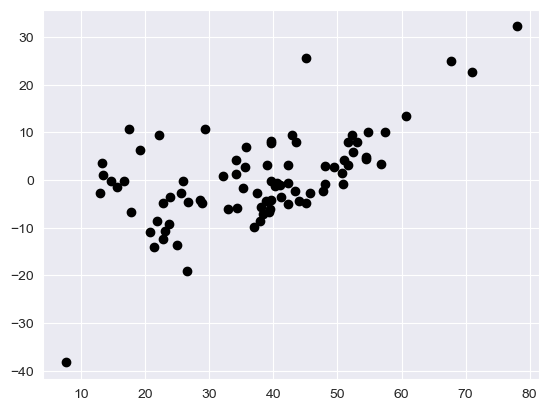

In [23]:
X_train, X_test, y_train, y_test = train_test_split(real_estate[["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station","X4 number of convenience stores"]].values, real_estate[["Y house price of unit area"]].values, test_size=0.2)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


# # Plot outputs
fig, ax = plt.subplots()
residuals = []
for index, value in enumerate(y_pred):
    residuals.append(y_test[index,0] - value)
ax.scatter(x=y_test,y=residuals, color="black")

plt.show()

## 5.

Using the same dataset from task 4) compute the parameters of the multivariate regression model via gradient descent.
Compare the calculated parameters with the ones obtained in task 4) via sklearn. Is there any difference? If so give your explanation.

In [22]:
def comp_cost(X, y, theta):
    """Compute cost given X, y and parameters theta."""
    return J

In [ ]:
def grad_descent(X, y, theta, alpha, num_iters):
    """Perform gradient descent"""
    return J_history, theta